0    6374
1    1622
Name: Label_train, dtype: int64
not_foggy    1622
foggy        1622
Name: Label, dtype: int64
Best k found: 15
[[407  39]
 [ 43 485]]
              precision    recall  f1-score   support

           0       0.90      0.91      0.91       446
           1       0.93      0.92      0.92       528

    accuracy                           0.92       974
   macro avg       0.92      0.92      0.92       974
weighted avg       0.92      0.92      0.92       974



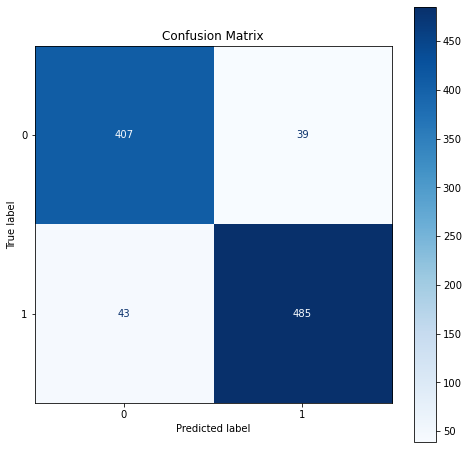

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt


df = pd.read_csv("fog_aware_stats_horizontal_3_patches_pivot.csv")


df['Label_train'] = np.where(df['Label'] == 'foggy', 1, 0)

print(df['Label_train'].value_counts())


num_to_drop = 4752
not_foggy_indices = df[df['Label_train'] == 0].index


if len(not_foggy_indices) < num_to_drop:
    print("Warning: The specified number of data points to drop is greater than the count of 'not_foggy' class.")
else:
    
    np.random.seed(42)
    drop_indices = np.random.choice(not_foggy_indices, num_to_drop, replace=False)
    df_filtered = df.drop(drop_indices)

    
    print(df_filtered['Label'].value_counts())

    
    X = df_filtered.drop(['Label', 'Label_train', 'photo', 'site'], axis=1)
    y = df_filtered['Label_train']
    X_scaled = StandardScaler().fit_transform(X)

   
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

    
    params = {'n_neighbors': range(1, 21)}
    knn = KNeighborsClassifier()
    grid_search = GridSearchCV(knn, params, cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)

    
    best_k = grid_search.best_params_['n_neighbors']
    print(f"Best k found: {best_k}")

    
    knn_best = KNeighborsClassifier(n_neighbors=best_k)
    knn_best.fit(X_train, y_train)

    
    y_pred = knn_best.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    print(cm)
    print(classification_report(y_test, y_pred))

    
    fig, ax = plt.subplots(figsize=(8, 8))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn_best.classes_)
    disp.plot(cmap=plt.cm.Blues, ax=ax)
    ax.set_title("Confusion Matrix")
    plt.show()


In [5]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_pred = knn_best.predict(X_test)


print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


print("\nClassification Report:")
print(classification_report(y_test, y_pred))


accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)


print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


Confusion Matrix:
[[407  39]
 [ 43 485]]

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.91      0.91       446
           1       0.93      0.92      0.92       528

    accuracy                           0.92       974
   macro avg       0.92      0.92      0.92       974
weighted avg       0.92      0.92      0.92       974

Accuracy: 0.9158
Precision: 0.9256
Recall: 0.9186
F1 Score: 0.9221


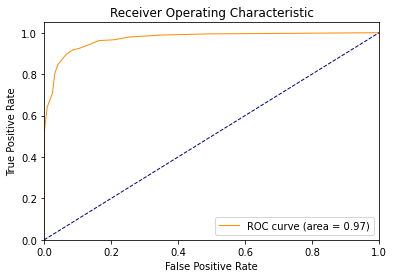

In [2]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt


y_scores = knn_best.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)


plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


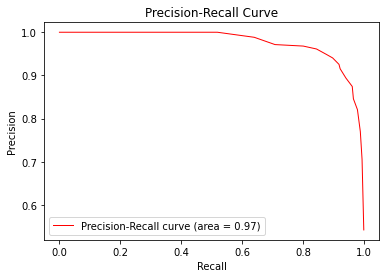

In [12]:
from sklearn.metrics import precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt


y_scores = knn_best.predict_proba(X_test)[:, 1]
precision, recall, thresholds = precision_recall_curve(y_test, y_scores)
average_precision = average_precision_score(y_test, y_scores)


plt.figure()
plt.plot(recall, precision, color='r', lw=1, label='Precision-Recall curve (area = %0.2f)' % average_precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()


0    6374
1    1622
Name: Label_train, dtype: int64
not_foggy    1622
foggy        1622
Name: Label, dtype: int64
Best k found: 15
[[407  39]
 [ 43 485]]
              precision    recall  f1-score   support

           0       0.90      0.91      0.91       446
           1       0.93      0.92      0.92       528

    accuracy                           0.92       974
   macro avg       0.92      0.92      0.92       974
weighted avg       0.92      0.92      0.92       974



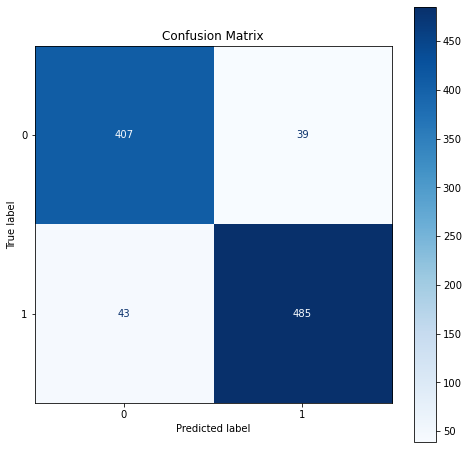

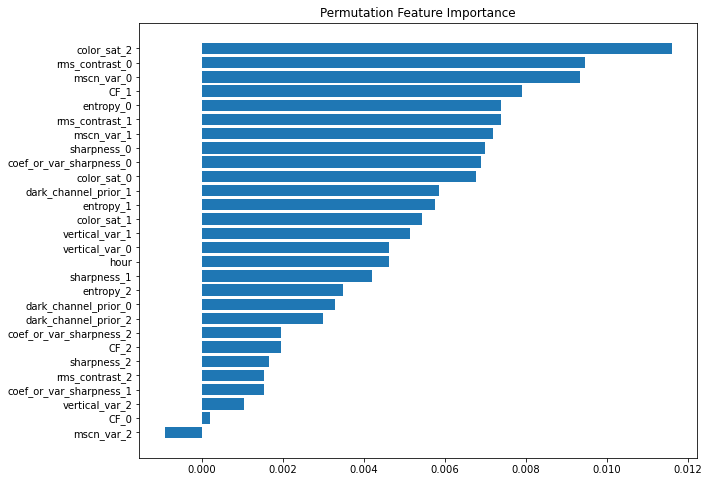

In [6]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt

df = pd.read_csv("fog_aware_stats_horizontal_3_patches_pivot.csv")


df['Label_train'] = np.where(df['Label'] == 'foggy', 1, 0)


print(df['Label_train'].value_counts())


num_to_drop = 4752
not_foggy_indices = df[df['Label_train'] == 0].index


if len(not_foggy_indices) < num_to_drop:
    print("Warning: The specified number of data points to drop is greater than the count of 'not_foggy' class.")
else:
    
    np.random.seed(42)
    drop_indices = np.random.choice(not_foggy_indices, num_to_drop, replace=False)
    df_filtered = df.drop(drop_indices)

    
    print(df_filtered['Label'].value_counts())

    
    X = df_filtered.drop(['Label', 'Label_train', 'photo', 'site'], axis=1)
    y = df_filtered['Label_train']
    X_scaled = StandardScaler().fit_transform(X)

   
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)


    params = {'n_neighbors': range(1, 21)}
    knn = KNeighborsClassifier()
    grid_search = GridSearchCV(knn, params, cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)


    best_k = grid_search.best_params_['n_neighbors']
    print(f"Best k found: {best_k}")


    knn_best = KNeighborsClassifier(n_neighbors=best_k)
    knn_best.fit(X_train, y_train)

    y_pred = knn_best.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    print(cm)
    print(classification_report(y_test, y_pred))


    fig, ax = plt.subplots(figsize=(8, 8))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn_best.classes_)
    disp.plot(cmap=plt.cm.Blues, ax=ax)
    ax.set_title("Confusion Matrix")
    plt.show()

    results = permutation_importance(knn_best, X_test, y_test, n_repeats=10, random_state=42, n_jobs=-1)
    feature_importance = results.importances_mean

    plt.figure(figsize=(10, 8))
    sorted_idx = np.argsort(feature_importance)
    plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
    plt.yticks(range(len(sorted_idx)), [X.columns[i] for i in sorted_idx])
    plt.title('Permutation Feature Importance')
    plt.show()


0    6374
1    1622
Name: Label_train, dtype: int64
not_foggy    1622
foggy        1622
Name: Label, dtype: int64
Best k found: 15
[[407  39]
 [ 43 485]]
              precision    recall  f1-score   support

           0       0.90      0.91      0.91       446
           1       0.93      0.92      0.92       528

    accuracy                           0.92       974
   macro avg       0.92      0.92      0.92       974
weighted avg       0.92      0.92      0.92       974



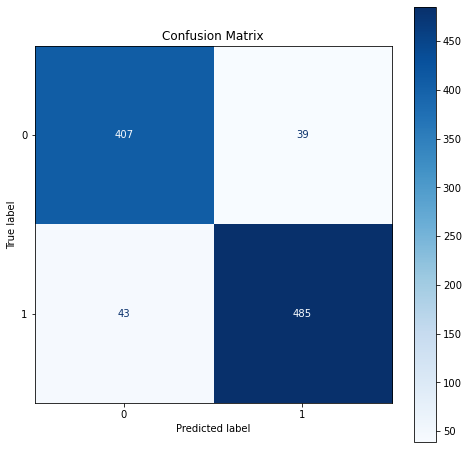

Features with negative importance: ['mscn_var_2']
Best k found for filtered model: 1
[[443   3]
 [ 12 516]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       446
           1       0.99      0.98      0.99       528

    accuracy                           0.98       974
   macro avg       0.98      0.99      0.98       974
weighted avg       0.98      0.98      0.98       974



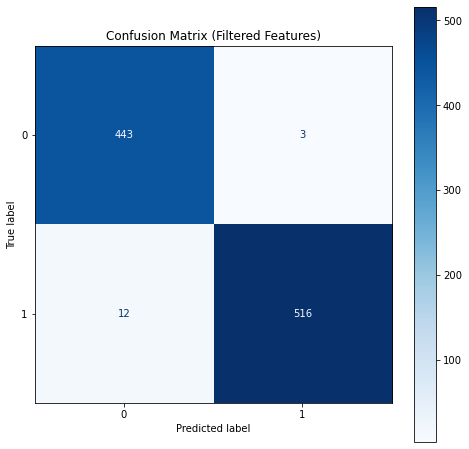

In [10]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt


df = pd.read_csv("fog_aware_stats_horizontal_3_patches_pivot.csv")


df['Label_train'] = np.where(df['Label'] == 'foggy', 1, 0)


print(df['Label_train'].value_counts())


num_to_drop = 4752
not_foggy_indices = df[df['Label_train'] == 0].index


if len(not_foggy_indices) < num_to_drop:
    print("Warning: The specified number of data points to drop is greater than the count of 'not_foggy' class.")
else:
   
    np.random.seed(42)
    drop_indices = np.random.choice(not_foggy_indices, num_to_drop, replace=False)
    df_filtered = df.drop(drop_indices)


    print(df_filtered['Label'].value_counts())

    X = df_filtered.drop(['Label', 'Label_train', 'photo', 'site'], axis=1)
    y = df_filtered['Label_train']
    X_scaled = StandardScaler().fit_transform(X)

    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)


    params = {'n_neighbors': range(1, 21)}
    knn = KNeighborsClassifier()
    grid_search = GridSearchCV(knn, params, cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)

    best_k = grid_search.best_params_['n_neighbors']
    print(f"Best k found: {best_k}")

    knn_best = KNeighborsClassifier(n_neighbors=best_k)
    knn_best.fit(X_train, y_train)

    y_pred = knn_best.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    print(cm)
    print(classification_report(y_test, y_pred))


    fig, ax = plt.subplots(figsize=(8, 8))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn_best.classes_)
    disp.plot(cmap=plt.cm.Blues, ax=ax)
    ax.set_title("Confusion Matrix")
    plt.show()

    
    results = permutation_importance(knn_best, X_test, y_test, n_repeats=10, random_state=42, n_jobs=-1)
    feature_importance = results.importances_mean

    
    negative_importance_features = [X.columns[i] for i in np.where(feature_importance < 0)[0]]
    print("Features with negative importance:", negative_importance_features)

    
    columns_to_drop = negative_importance_features + ['Label', 'photo', 'site']
    X_filtered = df_filtered.drop(columns=columns_to_drop)
    y_filtered = df_filtered['Label_train']
    X_scaled_filtered = StandardScaler().fit_transform(X_filtered)

   
    X_train_filtered, X_test_filtered, y_train_filtered, y_test_filtered = train_test_split(X_scaled_filtered, y_filtered, test_size=0.3, random_state=42)

    
    grid_search_filtered = GridSearchCV(knn, params, cv=5, scoring='accuracy')
    grid_search_filtered.fit(X_train_filtered, y_train_filtered)

    
    best_k_filtered = grid_search_filtered.best_params_['n_neighbors']
    print(f"Best k found for filtered model: {best_k_filtered}")

   
    knn_best_filtered = KNeighborsClassifier(n_neighbors=best_k_filtered)
    knn_best_filtered.fit(X_train_filtered, y_train_filtered)

    
    y_pred_filtered = knn_best_filtered.predict(X_test_filtered)
    cm_filtered = confusion_matrix(y_test_filtered, y_pred_filtered)
    print(cm_filtered)
    print(classification_report(y_test_filtered, y_pred_filtered))

    
    fig, ax = plt.subplots(figsize=(8, 8))
    disp_filtered = ConfusionMatrixDisplay(confusion_matrix=cm_filtered, display_labels=knn_best_filtered.classes_)
    disp_filtered.plot(cmap=plt.cm.Blues, ax=ax)
    ax.set_title("Confusion Matrix (Filtered Features)")
    plt.show()
